# TRABAJO FINAL ANALITICA DESCRIPTIVA
### Dactos:
MILTON TARSIAN GARCIA  PAYERO
2020 10676

# Api de  la SuperIntendencias de Bancos

In [2]:
#Librerías necesarias para seguir el  ejercicio. 
import json
import requests
import pandas as pd

#Variable para saber si hay más página 
next_page = True
#Página inicial
pagina = 1
#Registros que queremos por petición.
#Seleccionar un número que se adapte a sus necesidades menor a 100k.
registro = 100_000

#Rango de fecha a consultar
periodo_inicial = '2022-01'
periodo_final = '2023-05'

#Endpoint que se consultará
end_point = 'carteras/creditos/clasificacion-riesgo'

#Colopar API KEY personal en la variable headers
headers={
          'Ocp-Apim-Subscription-Key': 'b308e31de8894b1085a24dfb16d2d27e' ,   
          'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36',
}


#Listas que almacenará los datos
registros_list = []

#El ciclo funcionará hasta que se llegue a la última página de la petición
while next_page:
    
    #Concatenamos las variables para formar la url de la consulta
    url = f'https://apis.sb.gob.do/estadisticas/v2/{ end_point }?periodoInicial={ periodo_inicial }&periodoFinal={ periodo_final }&tipoEntidad=BM&paginas={ pagina }&registros={ registro }'

    try:
        #Hacemos la petición
        response  = requests.get(url, headers=headers) 
        #Validamos el estatus de la petición según el protocolo http.
        response.raise_for_status()
        
        #Parseamos la respuesta con los datos a Json
        datos = response.json()
        
        #Agregamos los datos a una lista conformada por dataframes de pandas
        registros_list.append(pd.DataFrame(datos))
    
        #Obtenemos los metadatos que necesitamos, los cuales decribimos más arriba en el artículo.    
        #Parseamos
        metadatos = json.loads(response.headers['x-pagination'])
        
        #Obtebemos los metadatos necesarios
        next_page = metadatos['HasNext']
        total_pages =  metadatos['TotalPages']
        total_record = metadatos["TotalRecords"]
        
        #Imprimimos la página actual y el total de página
        print('Pagina:',pagina,'/',total_pages)
        
        #Incrementamos 1 para ir a la siguiente página
        pagina +=1
        
    except requests.exceptions.HTTPError as errh:
        print("Error HTTP:", errh)
        raise errh
    except requests.exceptions.ConnectionError as errc:
        print("Error de conexión:", errc)
        raise errc
    except requests.exceptions.Timeout as errt:
        print("Error Timeout:", errt)
        raise errt
    except requests.exceptions.RequestException as err:
        print("Algo salío mal:", err)
        raise err
        
#Concatenamos la lista de dataframes en uno solo       
registros = pd.concat(registros_list, ignore_index=True)

#Vemos los primeros cinco regístros del dataframe
registros.head(10)


Pagina: 1 / 1


,periodo,tipoEntidad,entidad,clasificacionRiesgo,tipoCartera,cantidadPlastico,cantidadCredito,deuda,tasaPorDeuda,tasaPromedioPonderado,deudaCapital,deudaVencida,deudaVencidaDe31A90Dias,valorDesembolso,valorGarantia,valorProvisionCapitalYRendimiento
0,2022-01,BANCOS MÚLTIPLES,ACTIVO,A,Créditos comerciales,144,221,1.761682e+08,2.702855e+09,15.342462,1.746936e+08,0.00,0.00,2321297.40,6.833458e+07,5891149.62
1,2022-01,BANCOS MÚLTIPLES,ACTIVO,A,Créditos de consumo,0,1560,3.919434e+08,5.985707e+09,15.271867,3.882756e+08,0.00,0.00,15965308.00,1.604229e+08,8088906.95
2,2022-01,BANCOS MÚLTIPLES,ACTIVO,A,Créditos Hipotecarios,0,74,1.763187e+08,2.064370e+09,11.708170,1.747917e+08,0.00,0.00,3500000.00,1.754220e+08,1763187.01
3,2022-01,BANCOS MÚLTIPLES,ACTIVO,A,Tarjetas de créditos,5819,4623,1.881079e+08,9.751242e+09,51.838563,1.841560e+08,0.00,0.00,25658006.83,0.000000e+00,1881077.93
4,2022-01,BANCOS MÚLTIPLES,ACTIVO,B,Créditos comerciales,32,42,1.002842e+07,2.219457e+08,22.131674,9.791114e+06,361020.59,361020.59,1068711.48,0.000000e+00,1349650.78
5,2022-01,BANCOS MÚLTIPLES,ACTIVO,B,Créditos de consumo,0,56,2.837421e+07,4.425321e+08,15.596280,2.779878e+07,1029286.86,1029286.86,0.00,6.685400e+06,3180554.57
6,2022-01,BANCOS MÚLTIPLES,ACTIVO,B,Créditos Hipotecarios,0,2,8.154231e+05,1.300844e+07,15.952992,8.022186e+05,7840.00,7840.00,0.00,8.154231e+05,8154.24
7,2022-01,BANCOS MÚLTIPLES,ACTIVO,B,Tarjetas de créditos,109,82,5.742516e+06,2.964061e+08,51.616062,5.246428e+06,4908571.26,4908571.26,23873.34,0.000000e+00,172273.42
8,2022-01,BANCOS MÚLTIPLES,ACTIVO,C,Créditos comerciales,6,6,3.222384e+06,6.005568e+07,18.637033,3.119742e+06,135260.22,135260.22,242624.24,7.102205e+05,644472.91
9,2022-01,BANCOS MÚLTIPLES,ACTIVO,C,Créditos de consumo,0,30,1.699926e+06,3.526528e+07,20.745187,1.630297e+06,557408.16,557408.16,0.00,0.000000e+00,339985.16


# TEMA Y PROBLEMATICA
### Análisis de las instituciones financieras de la República Dominicana. (Bancos múltiples)Analizar los años desde enero 2022 hasta diciembre 2023. Y realizar lo siguiente en Python utilizando pandas, numpy y matplotlib:


#### 1- Analizar la evolución de cartera de crédito total 

In [3]:
# Agrupamos los datos por periodo y sumamos la columna cantidadCredito
cartera_total_por_periodo = registros.groupby('periodo')['cantidadCredito'].sum().reset_index()

# Renombramos la columna 
cartera_total_por_periodo = cartera_total_por_periodo.rename(columns={'cantidadCredito': 'cartera_total'})

print(cartera_total_por_periodo)

    periodo  cartera_total
0   2022-01        3723649
1   2022-02        3817043
2   2022-03        3817782
3   2022-04        3891553
4   2022-05        3926032
5   2022-06        4007912
6   2022-07        4097085
7   2022-08        4145807
8   2022-09        4203331
9   2022-10        4294307
10  2022-11        4433193
11  2022-12        4376891
12  2023-01        4462740
13  2023-02        4569836
14  2023-03        4606843
15  2023-04        4697776
16  2023-05        4782086


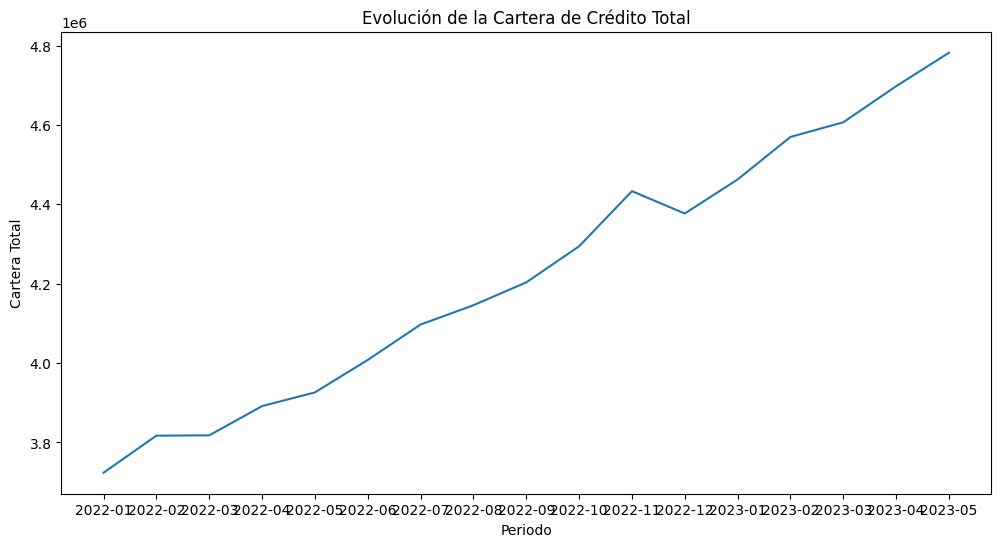

In [4]:
import matplotlib.pyplot as plt

# Este código crea un gráfico de líneas donde el eje x representa el periodo y el eje y representa la cartera total.

plt.figure(figsize=(12, 6))
plt.plot(cartera_total_por_periodo['periodo'], cartera_total_por_periodo['cartera_total'])
plt.xlabel('Periodo')
plt.ylabel('Cartera Total')
plt.title('Evolución de la Cartera de Crédito Total')
plt.show()

#### 2- Analizar la evolución de las carteras de crédito (Hipotecarios, Consumo, Tarjetas y Comerciales)


In [5]:
# Agrupar por periodo y tipoCartera, y sumar la columna cantidadCredito
cartera_por_periodo_tipo = registros.groupby(['periodo', 'tipoCartera'])['cantidadCredito'].sum().reset_index()

# Pivotear el DataFrame para tener un periodo por fila y un tipoCartera por columna
cartera_por_periodo_tipo = cartera_por_periodo_tipo.pivot(index='periodo', columns='tipoCartera', values='cantidadCredito')

# Rellenar los valores faltantes con 0
cartera_por_periodo_tipo = cartera_por_periodo_tipo.fillna(0)

print(cartera_por_periodo_tipo)

tipoCartera  Créditos Hipotecarios  Créditos comerciales  Créditos de consumo  \
periodo                                                                         
2022-01                      72723                359819              1570690   
2022-02                      73141                406120              1589271   
2022-03                      73437                381379              1604466   
2022-04                      73700                407173              1625180   
2022-05                      74045                367989              1657838   
2022-06                      74439                394141              1692417   
2022-07                      74776                414954              1723977   
2022-08                      75436                392465              1765290   
2022-09                      75837                363885              1815175   
2022-10                      76071                364270              1860695   
2022-11                     

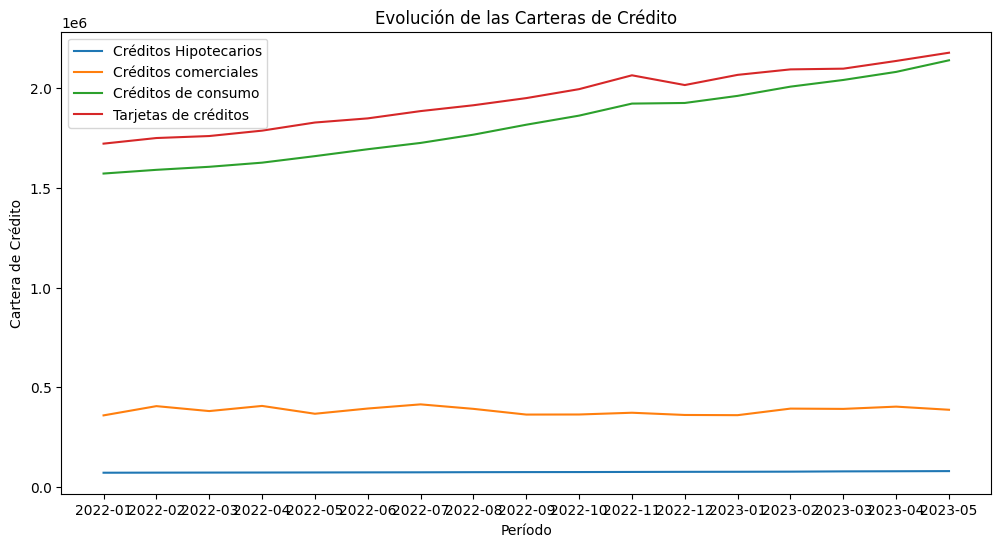

In [6]:
"""
Este código crea un gráfico de líneas donde cada línea representa un tipo de cartera de crédito.
El eje x representa el período y el eje y representa el valor de la cartera de crédito correspondiente.
"""

# Crear una figura y un conjunto de ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Graficar cada tipo de cartera
for cartera in cartera_por_periodo_tipo.columns:
    ax.plot(cartera_por_periodo_tipo.index, cartera_por_periodo_tipo[cartera], label=cartera)


ax.set_xlabel('Período')
ax.set_ylabel('Cartera de Crédito')
ax.set_title('Evolución de las Carteras de Crédito')
ax.legend()


plt.show()

#### 3- ¿Cuántas entidades se están evaluando?


In [7]:
# Obtener la lista de entidades únicas
entidades_unicas = registros['entidad'].unique()

# Contar la cantidad de entidades únicas
num_entidades = len(entidades_unicas)

print(f"Se están evaluando {num_entidades} entidades en total.")
print("Las entidades son:")
print(entidades_unicas)



Se están evaluando 16 entidades en total.
Las entidades son:
['ACTIVO' 'ADEMI' 'BANESCO' 'BANRESERVAS' 'BDI' 'BELLBANK' 'BHD' 'BLH'
 'CARIBE' 'CITIBANK' 'LAFISE' 'POPULAR' 'PROMERICA' 'SANTA CRUZ'
 'SCOTIABANK' 'VIMENCA']


#### 4- Cual entidad ha evolucionado más a nivel de monto de cartera

In [8]:
# Agrupar por entidad y periodo, y sumar la columna deuda
cartera_por_entidad_periodo = registros.groupby(['entidad', 'periodo'])['deuda'].sum().reset_index()

# Calcular la diferencia máxima por entidad utilizando expresiones lambda
evolucion_cartera = cartera_por_entidad_periodo.groupby('entidad')['deuda'].apply(lambda x: x.max() - x.min())

# Identificar la entidad con la mayor evolución
entidad_mayor_evolucion = evolucion_cartera.idxmax()

print(f"La entidad que ha evolucionado más a nivel de monto de cartera es: {entidad_mayor_evolucion}")

La entidad que ha evolucionado más a nivel de monto de cartera es: BANRESERVAS


#### 5- Analizar la clasificación de riesgo de las entidades sabiendo que A es menor que E

In [9]:
# Agrupar por entidad y clasificacionRiesgo, y sumar la columna deuda
riesgo_por_entidad = registros.groupby(['entidad', 'clasificacionRiesgo'])['deuda'].sum().reset_index()

# Pivotear el DataFrame para tener un periodo por fila y una clasificacionRiesgo por columna
riesgo_por_entidad = riesgo_por_entidad.pivot(index='entidad', columns='clasificacionRiesgo', values='deuda')

# Rellenar los valores faltantes con 0
riesgo_por_entidad = riesgo_por_entidad.fillna(0)

# Aplicar un formato de visualización a los valores numéricos
riesgo_por_entidad = riesgo_por_entidad.applymap(lambda x: '{:,.0f}'.format(x))

# Imprimir el resultado
print(riesgo_por_entidad)

clasificacionRiesgo                  A                  B                C  \
entidad                                                                      
ACTIVO                  15,363,584,574        894,700,530      274,688,072   
ADEMI                  206,520,420,674     15,850,865,193    3,146,628,105   
BANESCO                261,333,498,403     50,571,856,851   10,927,785,606   
BANRESERVAS          5,215,694,189,400  1,027,641,436,690  201,602,435,787   
BDI                    153,002,130,638     32,747,335,846   11,985,351,892   
BELLBANK                 8,600,673,414      1,457,733,361    2,085,106,717   
BHD                  3,557,949,593,440    487,314,554,810   75,395,573,001   
BLH                    135,546,622,829     33,379,307,847    7,787,868,480   
CARIBE                 215,278,867,451     26,716,941,279    8,334,196,895   
CITIBANK                46,134,714,917      9,928,324,012    2,899,278,511   
LAFISE                  60,271,921,495     17,419,788,954    3,1

C:\Users\DELL\AppData\Local\Temp\ipykernel_5400\454160466.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  riesgo_por_entidad = riesgo_por_entidad.applymap(lambda x: '{:,.0f}'.format(x))


#### 6- Calcular la morosidad de cada una de las entidades (deudavencida / deuda) y hacer un análisis de su comportamiento


In [10]:
# Agrupar por entidad y sumar deuda y deudaVencida
morosidad_por_entidad = registros.groupby('entidad')[['deuda', 'deudaVencida']].sum().reset_index()

# Calcular la morosidad
morosidad_por_entidad['morosidad'] = morosidad_por_entidad['deudaVencida'] / morosidad_por_entidad['deuda']

# Aplicar un formato de visualización a las columnas 'deuda' y 'deudaVencida'
morosidad_por_entidad['deuda'] = morosidad_por_entidad['deuda'].map('{:,.0f}'.format)
morosidad_por_entidad['deudaVencida'] = morosidad_por_entidad['deudaVencida'].map('{:,.0f}'.format)

# Imprimir el resultado
print(morosidad_por_entidad)

        entidad              deuda    deudaVencida  morosidad
0        ACTIVO     17,817,869,325   1,251,549,724   0.070241
1         ADEMI    233,319,228,569   6,463,054,491   0.027700
2       BANESCO    359,225,694,276   7,843,926,028   0.021836
3   BANRESERVAS  7,139,980,630,835  60,538,069,749   0.008479
4           BDI    231,983,969,563   3,154,892,083   0.013600
5      BELLBANK     13,480,700,839     174,647,704   0.012955
6           BHD  4,299,641,430,424  63,490,120,940   0.014766
7           BLH    192,115,231,543   2,821,246,541   0.014685
8        CARIBE    275,174,935,907   6,738,735,914   0.024489
9      CITIBANK     67,518,475,932      35,768,266   0.000530
10       LAFISE     89,100,071,626     524,006,641   0.005881
11      POPULAR  6,907,377,189,482  47,389,303,308   0.006861
12    PROMERICA    431,542,005,318   3,700,046,888   0.008574
13   SANTA CRUZ    856,238,238,480   9,379,286,875   0.010954
14   SCOTIABANK  1,534,394,209,212  28,876,170,143   0.018819
15      

#### 7- Calcular la morosidad de cada una de las entidades por tipo de carteras (Hipotecarios, Consumo, Tarjetas y Comerciales) y hacer un análisis de su comportamiento


In [11]:
# Agrupar por entidad, tipoCartera y sumar deuda y deudaVencida
morosidad_por_entidad_cartera = registros.groupby(['entidad', 'tipoCartera'])[['deuda', 'deudaVencida']].sum().reset_index()

# Calcular la morosidad
morosidad_por_entidad_cartera['morosidad'] = morosidad_por_entidad_cartera['deudaVencida'] / morosidad_por_entidad_cartera['deuda']

# Pivotear el DataFrame para tener una entidad por fila y un tipoCartera por columna
morosidad_por_entidad_cartera = morosidad_por_entidad_cartera.pivot(index='entidad', columns='tipoCartera', values='morosidad')

# Rellenar los valores faltantes con 0
morosidad_por_entidad_cartera = morosidad_por_entidad_cartera.fillna(0)

# Imprimir el resultado
print(morosidad_por_entidad_cartera)

tipoCartera  Créditos Hipotecarios  Créditos comerciales  Créditos de consumo  \
entidad                                                                         
ACTIVO                    0.001827              0.076532             0.056181   
ADEMI                     0.000344              0.029464             0.024537   
BANESCO                   0.013060              0.011652             0.043402   
BANRESERVAS               0.007090              0.005124             0.015811   
BDI                       0.012937              0.013211             0.015164   
BELLBANK                  0.069099              0.004693             0.034641   
BHD                       0.008720              0.009286             0.027094   
BLH                       0.004388              0.015789             0.015109   
CARIBE                    0.000100              0.007308             0.041571   
CITIBANK                  0.000000              0.000530             0.000000   
LAFISE                    0.

#### 8- A nivel de monto de cartera menciona el ranking 5 de entidades

In [12]:
# Agrupar por entidad y sumar la columna deuda
cartera_por_entidad = registros.groupby('entidad')['deuda'].sum().reset_index()

# Ordenar de mayor a menor según el monto de deuda
cartera_por_entidad = cartera_por_entidad.sort_values(by='deuda', ascending=False)

# Aplicar un formato de visualización a la columna 'deuda'
cartera_por_entidad['deuda'] = cartera_por_entidad['deuda'].map('{:,.0f}'.format)

# Seleccionar las 5 primeras entidades del ranking
top_5_entidades = cartera_por_entidad.head(5)

# Imprimir el resultado
print("Ranking de las 5 entidades con mayor monto de cartera:")
print(top_5_entidades)

Ranking de las 5 entidades con mayor monto de cartera:
        entidad              deuda
3   BANRESERVAS  7,139,980,630,835
11      POPULAR  6,907,377,189,482
6           BHD  4,299,641,430,424
14   SCOTIABANK  1,534,394,209,212
13   SANTA CRUZ    856,238,238,480


#### 9- Tabulación de datos estadísticos

##### a. Tomar las columnas de Entidad y cantidad de créditos

In [13]:
import numpy 

NameError: name 'np' is not defined

##### b. Crear el rango o recorrido de la cantidad de créditos

##### c. Calcular el número de intervalos o clases

##### d. Calcular la amplitud del intervalo de clase

##### e. Calcular los límites del intervalo


##### f. Calcular la tabulación

##### g. Calcular la marca de la clase o punto medio


##### h. Presentar la tabla de frecuencia 

#### 10- Realizar los siguientes gráficos

##### a. Grafico de columnas mostrando la morosidad del año 2023 por mes para cada una de las entidades


##### b. Grafico de barras mostrando el monto de deuda para el mes 12 del 2023 para cada entidad


##### c. En un grafico circular realizar la morosidad para cada tipo de producto para el año 2023 y el mes 12



##### d. Crear un gráfico de líneas con los balances de deuda para los años completos 2022 y 2023 para ver la evolución de las carteras


#### 11- Realizar un informe el cual nos diga según todo lo que analizo anteriormente que ocurrió durante estos periodos 2022-2023

